In [3]:
import pandas as pd
import numpy as np

#Reading csv files
column_names = ['text' , 'label']
train_data = pd.read_csv('imdb-dataset/Train.csv' , names=column_names , encoding='utf-8')
test_data = pd.read_csv('imdb-dataset/Test.csv' , names=column_names , encoding='utf-8')

#Extractinng train data into lists
train_text = train_data.text.tolist()
train_text.pop(0)
train_label = train_data.label.tolist()
train_label.pop(0)

#Extracting test data into lists 
test_text = test_data.text.tolist()
test_text.pop(0)
test_label = test_data.label.tolist()
test_label.pop(0)

#converting the labels into integers
for i in range(len(train_label)):
    train_label[i] = int(train_label[i])
    
for i in range(len(test_label)):
    test_label[i] = int(test_label[i])
 
#printing some of the data      
print(train_text[:5])
print(train_label[:5])

print(test_text[:5])
print(test_label[:5])

#converting the labels into arrays
train_label = np.array(train_label)
test_label = np.array(test_label)


['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.', "When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping t

In [4]:
vocab_size = 10000
embedding_dimension = 16
max_lenght = 120
trunc_type = 'post'
oov_tok = '<OOV>'

#tokenizing the data 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size , oov_token=oov_tok)
tokenizer.fit_on_texts(train_text)

#the text to sequence of words
sequences = tokenizer.texts_to_sequences(train_text)

#padding the sequences
padded = pad_sequences(sequences , maxlen=max_lenght , truncating=trunc_type)

#sequencing and padding for test data
test_sequences = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(test_sequences , maxlen=max_lenght)

In [5]:
#building the model
from tensorflow.keras.layers import Embedding , Dense , Dropout , Flatten , GlobalAveragePooling1D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(Embedding(vocab_size , embedding_dimension , input_length=max_lenght , mask_zero=True))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.3))
model.add(Dense(6 , activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1 , activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                        

In [6]:
#to reset the model for trainig again
import tensorflow as tf
tf.keras.backend.clear_session()

In [7]:
#trainig the the model
epochs = 5
history = model.fit(padded , train_label , epochs=epochs , validation_data=(test_padded , test_label))

Epoch 1/5
1250/1250 [==============================] - 5s 3ms/step - loss: 0.5392 - accuracy: 0.7359 - val_loss: 0.3531 - val_accuracy: 0.8630
Epoch 2/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3743 - accuracy: 0.8364 - val_loss: 0.3149 - val_accuracy: 0.8678
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3343 - accuracy: 0.8587 - val_loss: 0.3104 - val_accuracy: 0.8660
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3096 - accuracy: 0.8712 - val_loss: 0.3140 - val_accuracy: 0.8630
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2940 - accuracy: 0.8802 - val_loss: 0.3175 - val_accuracy: 0.8602


Text(0, 0.5, 'Training Accuracy')

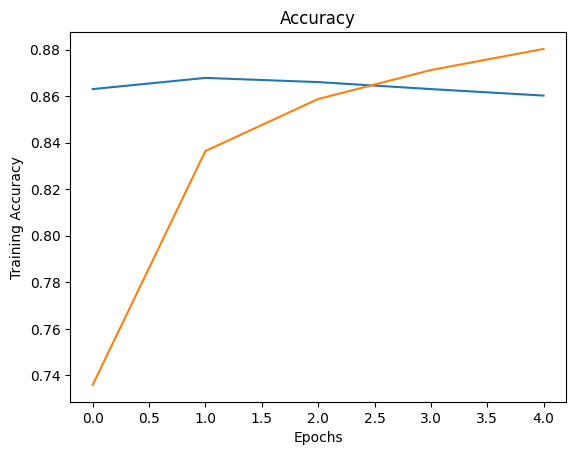

In [9]:
#plotting accuracy of model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['loss']

plt.plot(val_acc)
plt.plot(acc)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")



In [10]:
#saving model
model.save('model/sentiment-analysis-model.h5')